In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [49]:
data = pd.read_csv("../data/adult.csv")
data = data.replace("?", np.nan).dropna()
data["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [50]:
data["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [51]:
incorrect_salary_k = data[~data["salary K$"].astype(str).str.isdigit()]
incorrect_salary_k

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


# Task 1
Print the count of men and women in the dataset.

In [54]:
data["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [56]:
np.floor(data[data["sex"] == "Male"]["age"].mean())

39.0

# Task 3
Get the percentage of people from Poland (native-country)

In [66]:
poles = len(data[data["native-country"] == "Poland"])
round(poles / len(data) * 100, 2)

0.19

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [90]:
round(data[data["salary"] == ">50K"]["age"].mean())     #greater than 50, mean

44

In [81]:
round(data[data["salary"] == ">50K"]["age"].std(), 2)   #greater than 50, standard deviation

10.27

In [83]:
round(data[data["salary"] == "<=50K"]["age"].mean())    #less than 50, mean

37

In [84]:
round(data[data["salary"] == "<=50K"]["age"].std(), 2)  #less than 50, standard deviation

13.46

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [96]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

data[(~data["education"].isin(higher_education)) & (data["salary"] == ">50K")]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [100]:
data.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [123]:
married_men = data[(data["sex"] == "Male") & (data["marital-status"].str.startswith("Married"))]
non_married_men = data[(data["sex"] == "Male") & (~data["marital-status"].str.startswith("Married"))]

high_income_married_men = married_men[married_men["salary"] == ">50K"]
high_income_non_married_men = non_married_men[non_married_men["salary"] == ">50K"]
calc_married_men = round(len(high_income_married_men) / len(married_men) * 100, 1)
calc_non_married_men = round(len(high_income_non_married_men) / len(non_married_men) * 100, 1)

(f"{calc_married_men}% of married men earn more than 50k a year, while {calc_non_married_men}% of "
 f"unmarried men earn such a salary")

'44.8% of married men earn more than 50k a year, while 8.8% of unmarried men earn such a salary'

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [127]:
max_hours = data["hours-per-week"].max()
len(data[data["hours-per-week"] == max_hours])

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

In [143]:
numeric_correlation = data.corr(numeric_only=True).drop(columns="Unnamed: 0")
numeric_correlation

,age,hours-per-week,salary K$
Unnamed: 0,-0.001126,-0.001890,0.000129
age,1.000000,0.101599,0.208203
hours-per-week,0.101599,1.000000,0.196378
salary K$,0.208203,0.196378,1.000000


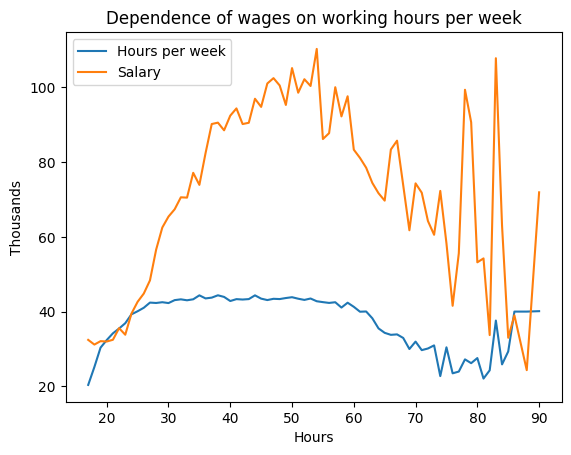

In [190]:
plt.figure()
plt.plot(data.groupby("age")["hours-per-week"].mean())
plt.plot(data.groupby("age")["salary K$"].mean())
plt.xlabel("Hours")
plt.ylabel("Thousands")
plt.title("Dependence of wages on working hours per week")
plt.legend(("Hours per week", "Salary"))

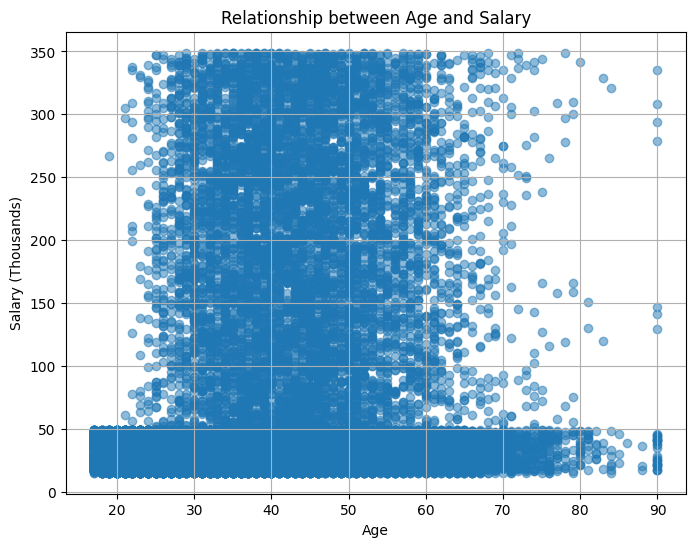

In [189]:
plt.figure(figsize=(8, 6))
plt.scatter(data["age"], data["salary K$"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Salary (Thousands)")
plt.title("Relationship between Age and Salary")
plt.grid(True)
plt.show()